<a href="https://colab.research.google.com/github/GUNTERMAXIMUS/covid-19predictCL/blob/master/Prediccion_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1.0
     ObservationDate Country/Region  Confirmed  Deaths  Recovered
3198      03/03/2020          Chile        1.0     0.0        0.0
3357      03/04/2020          Chile        1.0     0.0        0.0
3487      03/05/2020          Chile        4.0     0.0        0.0
3670      03/06/2020          Chile        4.0     0.0        0.0
3875      03/07/2020          Chile        4.0     0.0        0.0
4093      03/08/2020          Chile        8.0     0.0        0.0
4351      03/09/2020          Chile        8.0     0.0        0.0
4612      03/10/2020          Chile       13.0     0.0        0.0
4804      03/11/2020          Chile       23.0     0.0        0.0
5028      03/12/2020          Chile       23.0     0.0        0.0
5282      03/13/2020          Chile       43.0     0.0        0.0
5469      03/14/2020          Chile       61.0     0.0        0.0
5721      03/15/2020          Chile       74.0     0.0        0.0
5950      03/16/2020          Chile      155.0     0.0        0.0
6219

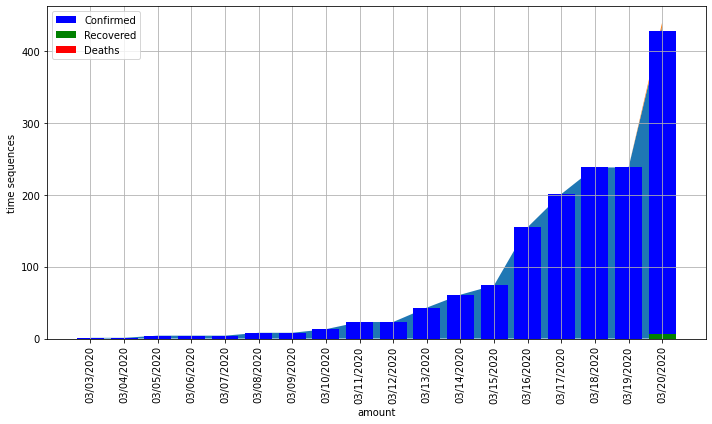

In [56]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

f_data = 'covid_19_data.csv' 
df_data = pd.read_csv(f_data, 
                      sep = ',', 
                      quotechar = '"', 
                      usecols = [1, 3, 5, 6 , 7], 
                      encoding = 'utf-8')

df = df_data[df_data['Country/Region'].str.contains('Chile')]#buscar un string especifico en el csv
print(df)
df.head(10)  

###

x = df.ObservationDate

plt.figure(figsize = (10, 6))
plt.bar(x, (df.Confirmed)-(df.Recovered + df.Deaths), label = 'Confirmed', color = 'blue')
plt.bar(x, df.Recovered, label = 'Recovered', color = 'green')
plt.bar(x, df.Deaths, label = 'Deaths', color = 'red')
plt.stackplot(x, df.Confirmed, df.Recovered, df.Deaths)
plt.xlabel('amount')
plt.ylabel('time sequences')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.grid(True)

plt.show()

###



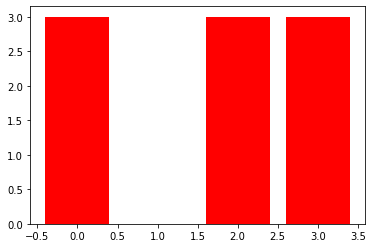

In [19]:
x = [0, 2, 3]
plt.bar(x, 3, label = 'Confirmed', color = 'red')#ASI FUNCIONA LA WEA

plt.show()

In [0]:
#PRGRECION LINEAL

[  1.   1.   4.   4.   4.   8.   8.  13.  23.  23.  43.  61.  74. 155.
 201. 238. 238. 434.]
[  1.   0.   3.   0.   0.   4.   0.   5.  10.   0.  20.  18.  13.  81.
  46.  37.   0. 196.]
[-26.67320261   5.34571723]


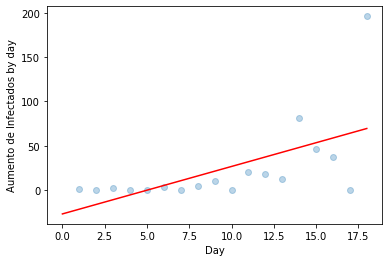

In [101]:
x = []
y = np.array((df.Confirmed))
t_d_a = 0
print(y)#casos confirmardos (totales, no la diferencia por dia)
for i in range(0, len(y), 1):
    x.append(i + 1)
    y[i] = y[i] - t_d_a
    t_d_a += y[i]

x = np.array(x)   

print(y)#diferencia de casos confirmados por dia

plt.scatter(x, y, alpha = 0.3)

x = np.array([np.ones(18), x]).T
B = np.linalg.inv(x.T @ x) @ x.T @ y#usamos la ecauacion de error cuadratico medio
print(B)
plt.plot([0, 18], [B[0] + B[1]*0, B[0] + B[1]*18], c = 'red')
plt.xlabel("Day")
plt.ylabel("Aumento de Infectados by day")
plt.show()